In [1]:
# import dependencies

## import torch
import torch 
import torch.nn as nn 
import torch.nn.functional as F # get us activation functions
from torch.optim import SGD # get us the optimizer

## import visulization
import matplotlib.pyplot as plt
import seaborn as sns



In [13]:
# creat a neural network with starting a class

# Class BasicNN inhert from nn.Module
class BasicNN(nn.Module):

    # init -> initialize weights and biases
    def __init__(self):

        super().__init__() # call the parent class constructor

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad = False) # create a weight matrix
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad = False) # create a bias vector
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad = False) # create a weight matrix

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad = False) # create a weight matrix
        self.b10 = nn.Parameter(torch.tensor(0), requires_grad = False) # create a bias vector
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad = False) # create a weight matrix

        self.final_bias = nn.Parameter(torch.tensor(-16), requires_grad = False) # create a bias vector
    
    # forward -> define the forward pass
    def forward(self, x):
        input_to_top_relu = x * self.w00 + self.b00 # multiply the input by the weight matrix and add the bias
        top_relu_output = F.relu(input_to_top_relu) # apply the relu activation function
        scaled_top_relu_output = top_relu_output * self.w01 # multiply the output of the relu by the weight matrix

        input_to_bottom_relu = x * self.w10 + self.b10 # multiply the input by the weight matrix and add the bias
        bottom_relu_output = F.relu(input_to_bottom_relu) # apply the relu activation function
        scaled_bottom_relu_output = bottom_relu_output * self.w11 # multiply the output of the relu by the weight matrix
        
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias # add the two relu outputs

        output = F.relu(input_to_final_relu) # apply the relu activation function

        return output
    

In [16]:
input_doses = torch.linspace(start = 0, end = 1, steps = 11) # create a tensor of 100 evenly spaced values between 0 and 1
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

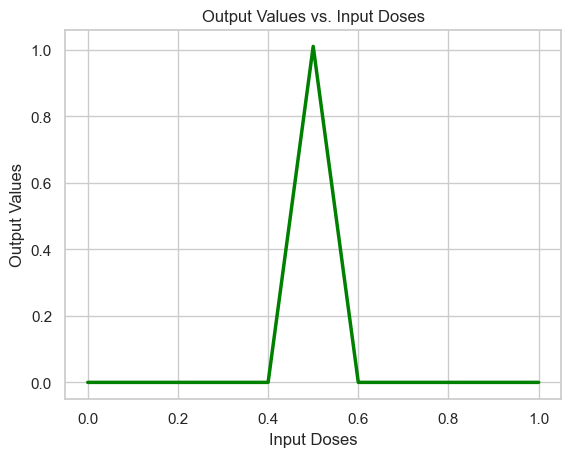

In [17]:
model = BasicNN() # create an instance of the BasicNN class

output_values = model(input_doses) # pass the input tensor through the model

# visualize with seaborn
sns.set(style = "whitegrid")
sns.lineplot(x = input_doses, y = output_values.squeeze(), color = "green", linewidth = 2.5)
plt.xlabel("Input Doses")
plt.ylabel("Output Values")
plt.title("Output Values vs. Input Doses")
plt.show()